In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression, Lars
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy.linalg import eig, eigvals
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Question 1

In [247]:
# build confidence bounds for a_prime*beta
# a_prime is the constraint. 
# We already know Beta_hat, 
#generate the data from the model
#fit a model to get beta_star values. For each value of beta_star, just multiply it by a_prime
#the goal is to say that even though the data is generated from three sources, the linear model
# is still strong enough to make things work

In [31]:
a_vals = np.array([0, 1.2, -.3, 4.5])
b_vals = np.array([0, 2, -1.5, 1])
length = 50
reps = 10000

In [32]:
count1 = 0
count2 = 0
for i in range(reps):
    
    #generate data
    data = pd.DataFrame(index = np.arange(length), columns = ['x1', 'x2', 'x3', 'y'])
    data['x1'] = np.random.normal(0, 1, size = data.index.size)
    data['x2'] = np.random.normal(5, 1, size = data.index.size)
    data['x3'] = np.random.normal(7, 2, size = data.index.size)
    data['x12'] = data['x1']**2
    data['x13'] = data['x1']**3
    data['y'] = b_vals[0] + (b_vals[1]*data['x1']) +  + (b_vals[2]*data['x2']) + (b_vals[3]*data['x3']) + np.random.normal(0, 1, size = data.index.size)
    
    #method a
    regr = smf.ols('y ~ x1 + x12 + x13', data=data).fit()
    ci_data = regr.conf_int()
    ci_data['a0'] = a_vals*ci_data[0]
    ci_data['a1'] = a_vals*ci_data[1]
    
    if b_vals[1] >= ci_data[0]['x1'] and b_vals[1] <= ci_data[1]['x1']:
        count1 += 1
    
    #method b
    regr2 = smf.ols('y ~ x1 + x2 + x3', data=data).fit()
    ci_data2 = regr2.conf_int()
    ci_data2['a0'] = a_vals*ci_data2[0]
    ci_data2['a1'] = a_vals*ci_data2[1]
    
    if b_vals[1] >= ci_data2[0]['x1'] and b_vals[1] <= ci_data2[1]['x1']:
        count2 += 1

print("a_prime*beta is in the confidence interval for method a {} percent of the time".format(100*count1/reps))
print("a_prime*beta is in the confidence interval for method b {} percent of the time".format(100*count2/reps))

a_prime*beta is in the confidence interval for method a 95.13 percent of the time
a_prime*beta is in the confidence interval for method b 95.36 percent of the time


# Question 2

In [248]:
# this is all wrong. You wrote the code for the wrong data set

In [330]:
data_df = pd.read_csv('data/prostate.data.txt', delimiter = '\t', index_col = 0)

In [331]:
train_df = data_df[data_df['train'] == 'T'].drop('train', axis = 1)
test_df = data_df[data_df['train'] == 'F'].drop('train', axis = 1)

In [332]:
#I am not sure that lpsa is the proper y algorithm
y_test = test_df['lpsa']
y_train = train_df['lpsa']
x_test = test_df.drop('lpsa', axis = 1)
x_train = train_df.drop('lpsa', axis = 1)

In [333]:
#you need a square matrix to compute the eigenvalues
#I do not know what to do
# eigvals(x_train)

In [334]:
#create a pcr model
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(x_train, y_train)
pca = pcr.named_steps['pca']
pcr_pred = pcr.predict(x_test)
pcr_mspe = np.mean(np.square(pcr_pred - y_test))
print("the mean squared prediction error using PCR is", pcr_mspe)

the mean squared prediction error using PCR is 0.5451924683164246


In [335]:
#create a pls model
pls = PLSRegression()
pls.fit(x_train, y_train)
pls_pred = pls.predict(x_test).reshape(1, -1)[0]
pls_mspe = np.mean(np.square(pls_pred - y_test))
print("the mean squared prediction error using PLS is", pls_mspe)

the mean squared prediction error using PLS is 0.5364204193435339


In [336]:
ridge = Ridge(alpha = 1.0)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge_mspe = np.mean(np.square(ridge_pred - y_test))
print("the mean squared prediction error using ridge regression is", ridge_mspe)

the mean squared prediction error using ridge regression is 0.5214005816347282


# Question 4

In [337]:
angle_regr = Lars(n_nonzero_coefs=0)
angle_regr.fit(x_train, y_train)
angle_pred = angle_regr.predict(x_test)
angle_mspe = np.mean(np.square(angle_pred - y_test))
print("the mean squared prediction error using least angle regression is", angle_mspe)

the mean squared prediction error using least angle regression is 1.056733228060382


# Question 6

In [ ]:
# we are never actually changing the data, 
# we are just fitting different models to the data that already exists

In [294]:
b0 = 3
b1 = 2
num_obs = 50
x_vals = np.random.uniform(0, 1, size = num_obs)
error_terms = np.random.normal(0, 1, size = num_obs)
y_squared = b0 + (b1*np.square(x_vals)) + error_terms
y_vals = np.sqrt(y_squared)

Text(0.5, 0, 'X')

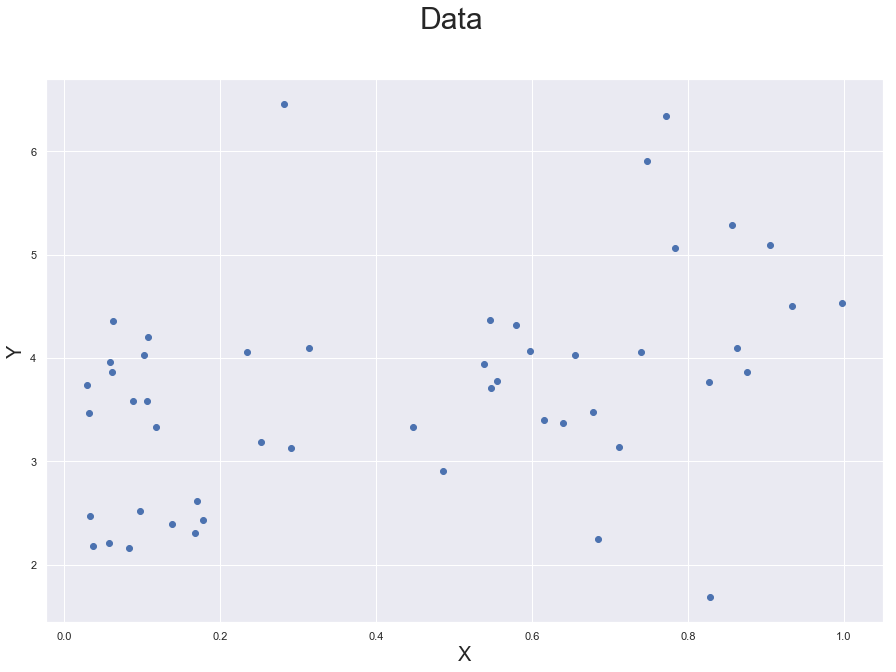

In [296]:
#plot the data
sns.set(style = 'darkgrid')
plt.figure(figsize = (15, 10))
plt.suptitle('Data', fontsize = 30)
plt.scatter(x_vals, y_squared)
plt.ylabel('Y', fontsize = 20)
plt.xlabel('X', fontsize = 20)

Text(0, 0.5, 'Residuals')

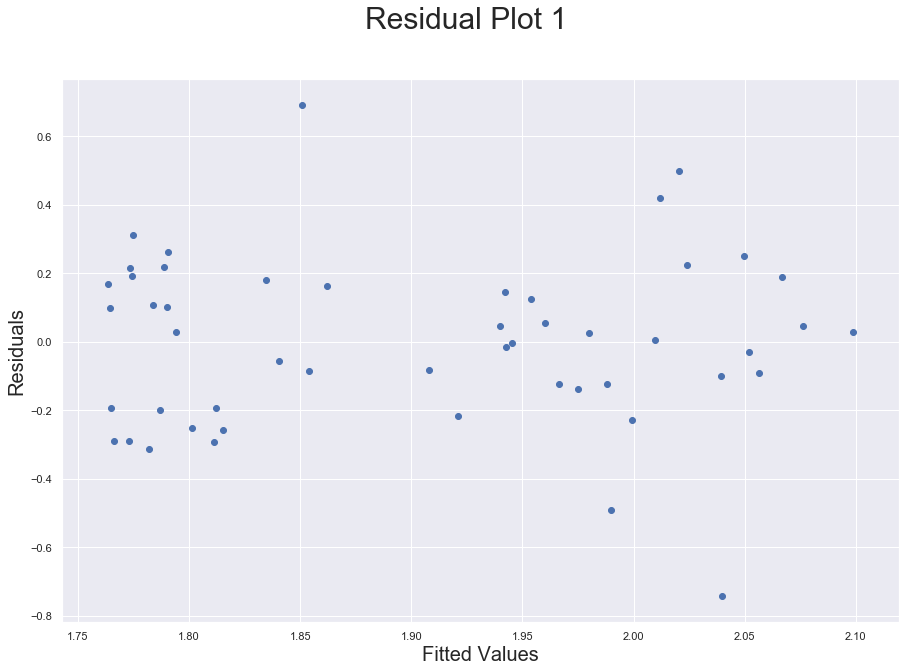

In [319]:
#fit a least squares regression line
regr = LinearRegression()
x_data = x_vals.reshape(50, 1)
regr.fit(x_data, y_vals)
preds = regr.predict(x_data)
resid = y_vals - preds
plt.figure(figsize = (15, 10))
plt.suptitle('Residual Plot 1', fontsize = 30)
plt.scatter(preds, resid)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

Residuals are evenly distributed around 0

Text(0, 0.5, 'Residuals')

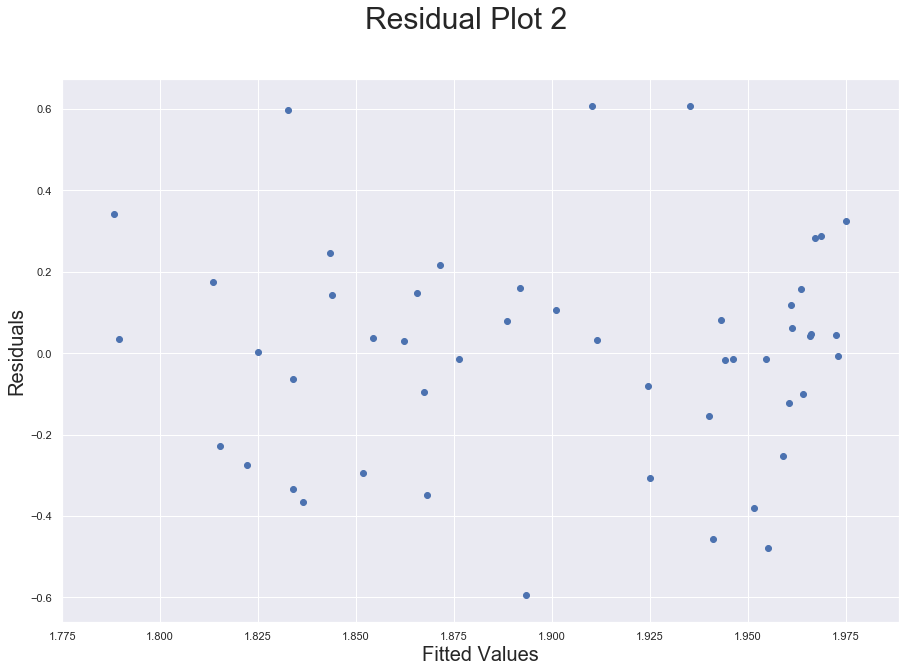

In [320]:
#fit a least squares regression line
regr1 = LinearRegression()
x_data = np.array([x_vals, np.square(x_vals)]).reshape(50, 2)
regr1.fit(x_data, y_vals)
preds = regr1.predict(x_data)
resid = y_vals - preds
plt.figure(figsize = (15, 10))
plt.suptitle('Residual Plot 2', fontsize = 30)
plt.scatter(preds, resid)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

Residuals are evenly distributed around 0

Text(0, 0.5, 'Residuals')

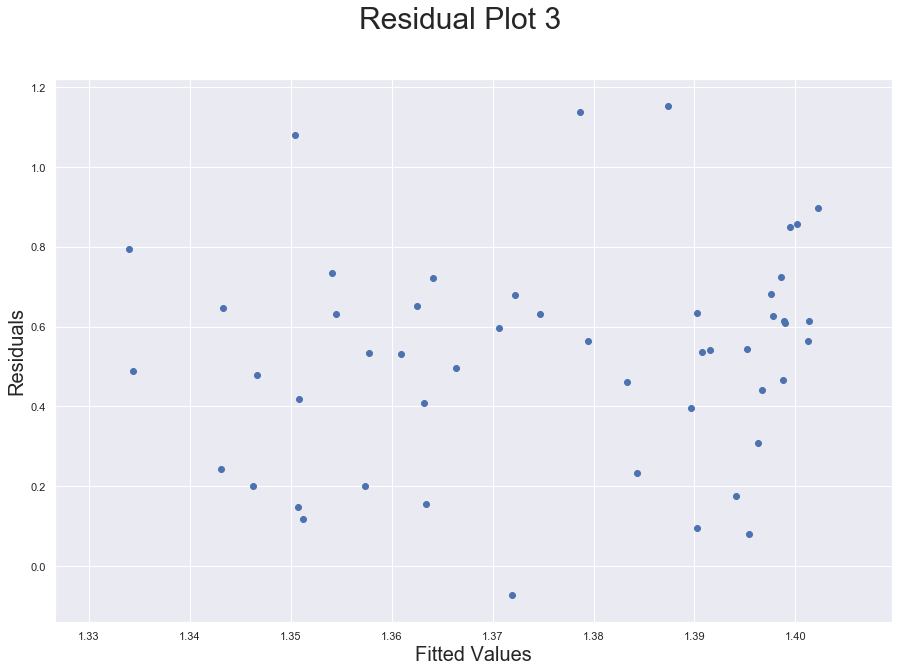

In [321]:
regr2 = LinearRegression()
regr2.fit(x_data, np.sqrt(y_vals))
preds2 = regr2.predict(x_data)
resid2 = y_vals - preds2
plt.figure(figsize = (15, 10))
plt.suptitle('Residual Plot 3', fontsize = 30)
plt.scatter(preds2, resid2)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

All but one of the residuals is greater than zero.

In [322]:
def w(y, lam):
    numer = pow(y, lam) - 1
    denom = lam
    return numer/denom

Text(0, 0.5, 'EPE')

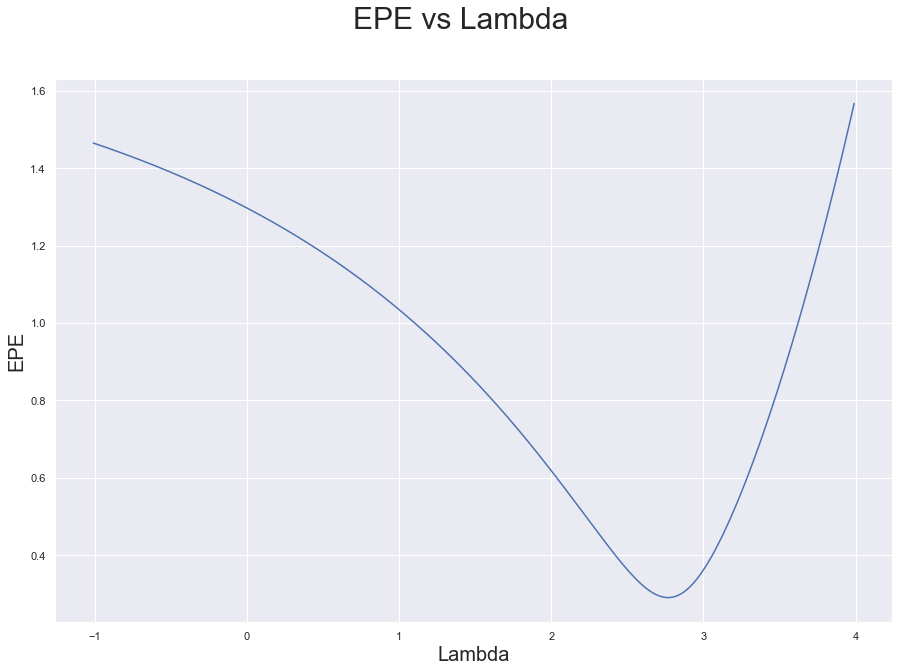

In [328]:
lam_vals = np.arange(-1.01, 4.01, step = .02)
regr3 = LinearRegression()
lam_data = {'lam' : lam_vals, 'EPE': []}

for lam in lam_vals:
    regr3.fit(x_data, w(y_vals, lam))
    preds3 = regr3.predict(x_data)
    epe = np.sqrt(np.mean(np.square(preds3 - y_vals)))
    lam_data['EPE'].append(epe)
    
plt.figure(figsize = (15, 10))
plt.suptitle('EPE vs Lambda', fontsize = 30)
plt.plot(lam_vals, lam_data['EPE'])
plt.xlabel('Lambda', fontsize = 20)
plt.ylabel('EPE', fontsize = 20)

EPE is minimized when Lamda is roughly 2.8

# Question 7

In [ ]:
# goal is to increase accuracy by using taylor expansions

In [341]:
x_vals = np.arange(-0.9, 1.1, .2)
y_vals = np.exp(-1*x_vals)

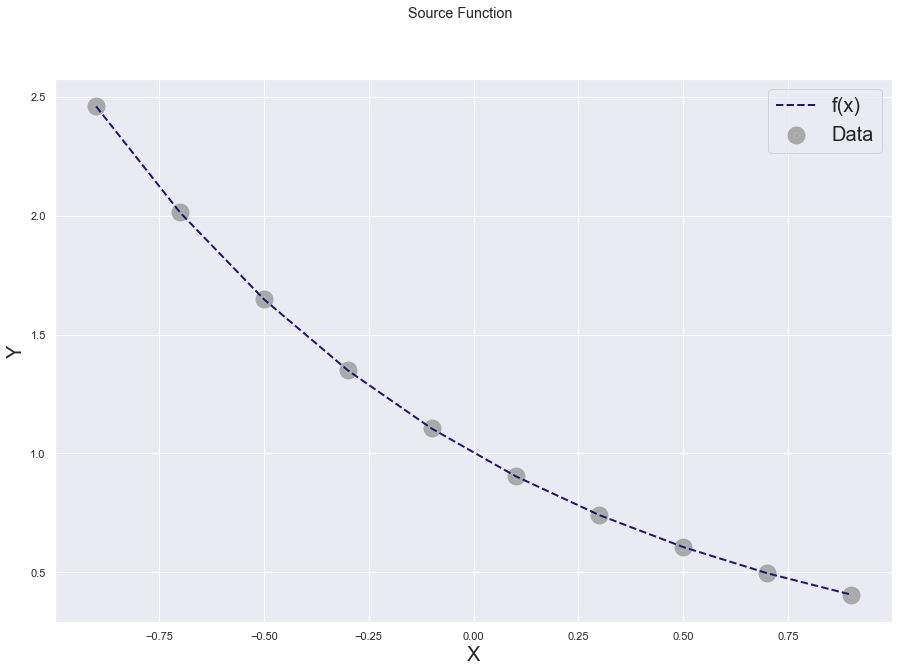

In [342]:
plt.figure(figsize = (15, 10))
plt.suptitle('Source Function')
plt.plot(x_vals, y_vals, '--', label = 'f(x)', color = 'midnightblue', linewidth=2, markersize=12)
plt.scatter(x_vals, y_vals, label = 'Data', color = 'darkgray', linewidths=12)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.legend(fontsize = 20)

In [343]:
chebyshev_polys = [lambda x: 1, 
                   lambda x: x, 
                   lambda x: 2*pow(x,2) - 1, 
                   lambda x: 4*pow(x,3) - 3*x, 
                   lambda x: 8*pow(x,4) - 8*pow(x,2) + 1,
                   lambda x: 16*pow(x,5) - 20*pow(x,3) + 5*x]

In [344]:
# generate covariate matrix from Chebyshev polynomials 
cov_mat = np.zeros((len(x_vals), 6))
for i in range(6):
    cov_mat[:, i] = chebyshev_polys[i](x_vals)
z = np.linalg.lstsq(cov_mat, y_vals, rcond = None)[0]
preds = np.dot(cov_mat, z)

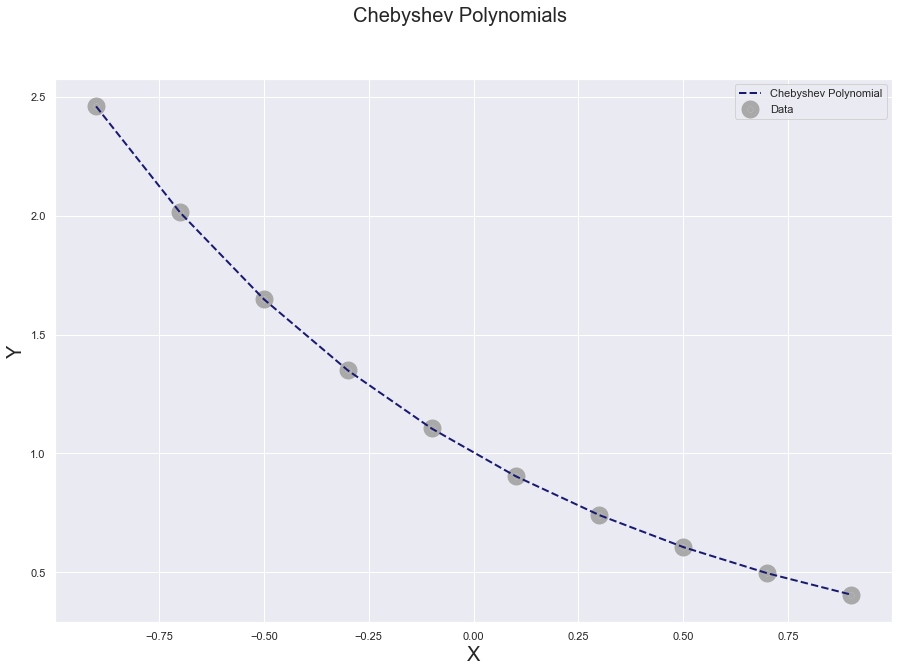

In [346]:
plt.figure(figsize = (15, 10))
plt.suptitle('Chebyshev Polynomials', fontsize = 20)
plt.plot(x_vals, preds, '--', label = 'Chebyshev Polynomial', color = 'midnightblue', linewidth=2)
plt.scatter(x_vals, y_vals, label = 'Data', color = 'darkgray', linewidths=12)
plt.xlabel('X', fontsize = 20)
plt.ylabel('Y', fontsize = 20)
plt.legend()
plt.show()

# Question 8

In [338]:
def f(t):
    return np.exp(t)

In [362]:
def fit_chebyshev(x, y, degree, chebyshev_polys):
    covariate_matrix = np.zeros((len(x), degree))
    for i in range(degree):
        covariate_matrix[:, i] = chebyshev_polys[i](x)
    
    regr = LinearRegression(fit_intercept = False)
    regr.fit(covariate_matrix, y)
    return regr.coef_, regr.predict(covariate_matrix)

In [363]:
def eval_chebyshev(x, coefs, chebyshev_polys):
    x_mat = np.zeros((len(x), len(coefs)))

    for i in range(len(coefs)):
        x_mat[:, i] = chebyshev_polys[i](x)

    return np.dot(x_mat, coefs) 

In [364]:
chebyshev_polys = [lambda x: 1, 
                   lambda x: x, 
                   lambda x: 2*pow(x,2) - 1, 
                   lambda x: 4*pow(x,3) - 3*x, 
                   lambda x: 8*pow(x,4) - 8*pow(x,2) + 1,
                   lambda x: 16*pow(x,5) - 20*pow(x,3) + 5*x]

Coeffient 0 = 1.2660508080957438
Coeffient 1 = 1.13033651044388
Coeffient 2 = 0.2714647112912575
Coeffient 3 = 0.0443510267114615
Coeffient 4 = 0.005436052086407729
Coeffient 5 = 0.0005510255287240327


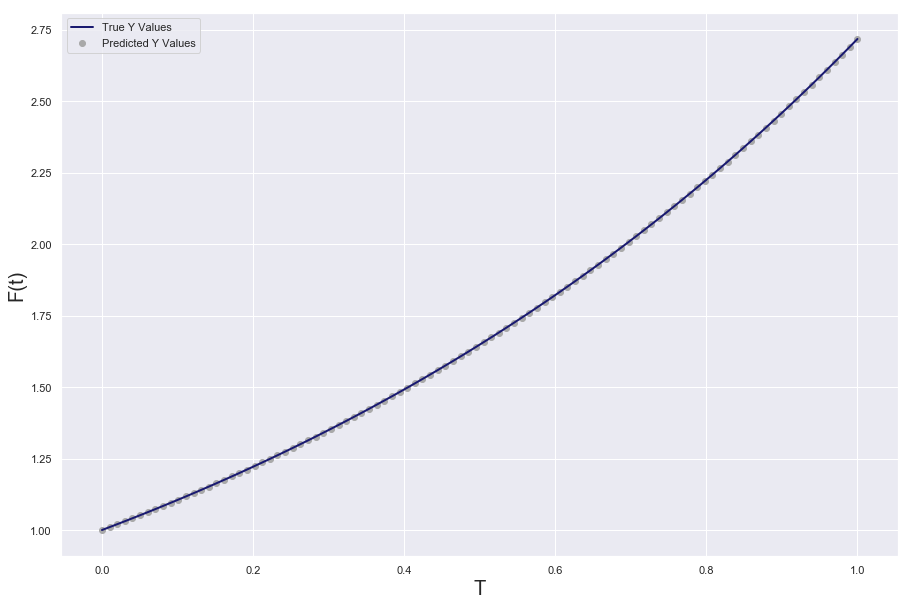

In [365]:
rand_t = np.random.uniform(low = -1, high =  1, size = 100)
rand_y = f(rand_t)

coefs, preds = fit_chebyshev(rand_t, rand_y, 6, chebyshev_polys)

t_vals = np.linspace(0, 1, 100)
y_vals = f(t_vals)
fitted_vals = eval_chebyshev(t_vals, coefs, chebyshev_polys)

n = 0
for c in coefs:
    print("Coeffient {} = {}".format(n, c))
    n += 1

plt.figure(figsize=(15, 10))
plt.scatter(t_vals, fitted_vals,  color = 'darkgray', linewidths=1, label="Predicted Y Values")
plt.plot(t_vals, y_vals, color = 'midnightblue', linewidth=2, label="True Y Values")
plt.xlabel("T", fontsize = 20)
plt.ylabel("F(t)", fontsize = 20)
plt.legend()
plt.show()